<center><h3>House Hunting in Amsterdam</h3></center>

<br/>

<center><img src="https://instagram.fcgh11-1.fna.fbcdn.net/vp/17b41c559ae6205e28c0ffbad3b222bc/5B93449B/t51.2885-15/sh0.08/e35/p640x640/30593619_333117893880535_6496140255698092032_n.jpg"></center>

Amsterdam's real estate market is experiencing a ressurgence, with property <a href="https://www.nytimes.com/2017/07/05/realestate/real-estate-in-amsterdam.html">prices steadily rising by double-digits on an yearly basis since 2013</a>. While home owners have a lot of reasons to laugh about, the same cannot be said of people looking for a home to buy or rent, specially expats. 

As a Brazilian making the move to across the ocean, this posed like an interesting subject to me. Hence I decided to take a closer look into the general landscape and perform some data analysis in order to answer the following questions:

1. How does rental prices distribution looks like?
2. Which are the hottest/cheapest/priciest areas?
3. Which area would be more interesting to start hunting?

And last but not least:

4. Can we predict apartment rental prices?

My approach was divided into the following steps:

* **Obtaining data**: using Python, I was able to scrape rental apartment data from some dutch websites.
* **Data cleaning:** this is usually the longest part of any data analysis process. In this case, it was important to clean the data in order to properly handle data formats, remove outliers, etc.
* **EDA:** some Exploratory Data Analysis analysis in order to visualize and better understand our data.
* **Predictive Analysis**: we will try to predict rental prices using a model trained with our dataset.
* **Feature Engineering**: in this step, we will play a bit with the dataset and add more features to make our model more accurate.

<h3>Let's Go Dutch!</h3>

In English, to "Go Dutch" usually means to split a bill at a restaurant or other occasions.

In my particular case, I will try to "go dutch" in order to try to find some bargains.

As a result of the "Obtaining our Data" step in our pipeline, we were able to get a dataset containing apartments for rent in Amsterdam as of February, 2018 in CSV format.

We will start out by creating a dataframe out of this dataset. Before that, let's import some libraries and set some configurations so everything runs smoothly in our notebook.

Please note that the data here is being used only for educational purposes. One should always check a website's terms of use before scraping data from it.

In [27]:
import numpy as np
import time
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [28]:
df = pd.read_csv('AMS-Apartments-Pararius.csv')

It's always good to take a look at our dataframe head, so we can have an idea of how it looks like.

In [29]:
df.head()

Unnamed: 0                  address  apartment_size  begin_date   category  \
0           0    Willem de Zwijgerlaan            50.0  2018-02-16  apartment   
1           9   Anton Constandsestraat            93.0  2018-02-16  apartment   
2          11               Leusdenhof            92.0  2018-02-16  apartment   
3          17           Pieter Postpad           103.0  2018-02-16  apartment   
4          20  Oudezijds Achterburgwal            55.0  2018-02-16  apartment   

            created_at             district1       id   latitude  longitude  \
0  2018-02-15T07:14:46        amsterdam-west  1037654  52.374235   4.863561   
1  2018-02-14T07:15:58        amsterdam-oost  1035398  52.346959   4.922161   
2  2018-01-17T07:02:16    amsterdam-zuidoost   922046  52.308798   4.978442   
3  2018-01-07T22:54:22  amsterdam-nieuw-west   890896  52.381874   4.794895   
4  2018-02-04T06:44:58     amsterdam-centrum  1000917  52.372062   4.897713   

                                           name  normalized_price  \
0    2 rooms apartment in Willem de Zwijgerlaan            1450.0   
1   4 rooms apartment in Anton Constandsestraat            1334.0   
2               4 rooms apartment in Leusdenhof            1550.0   
3           3 rooms apartment in Pieter Postpad             870.0   
4  3 rooms apartment in Oudezijds Achterburgwal            1500.0   

   number_of_bedrooms occupied_dates provider_code  city_code  
0                   2             []      pararius  amsterdam  
1                   4             []      pararius  amsterdam  
2                   4             []      pararius  amsterdam  
3                   3             []      pararius  amsterdam  
4                   3             []      pararius  amsterdam

In [30]:
df.shape

(1182, 16)

Our dataset contains 1182 apartments/observations, with 16 different variables. Let's see which datatypes are we looking at.

In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 16 columns):
Unnamed: 0            1182 non-null int64
address               1182 non-null object
apartment_size        1182 non-null float64
begin_date            1182 non-null object
category              1182 non-null object
created_at            1182 non-null object
district1             1160 non-null object
id                    1182 non-null int64
latitude              1182 non-null float64
longitude             1182 non-null float64
name                  1182 non-null object
normalized_price      1182 non-null float64
number_of_bedrooms    1182 non-null int64
occupied_dates        1182 non-null object
provider_code         1182 non-null object
city_code             1182 non-null object
dtypes: float64(4), int64(3), object(9)
memory usage: 147.8+ KB
None


In [32]:
df.describe()

Unnamed: 0  apartment_size            id     latitude    longitude  \
count  1182.000000     1182.000000  1.182000e+03  1182.000000  1182.000000   
mean   1324.521997       95.519459  8.495958e+05    52.361353     4.885836   
std     861.758504       42.953405  1.540571e+05     0.015751     0.033473   
min       0.000000       10.000000  6.121980e+05    52.290451     4.781664   
25%     533.500000       70.000000  6.877372e+05    52.352307     4.870610   
50%    1333.500000       88.000000  9.015765e+05    52.362794     4.886071   
75%    2064.250000      115.000000  9.923940e+05    52.372024     4.898219   
max    2957.000000      492.000000  1.043550e+06    52.410099     5.011357   

       normalized_price  number_of_bedrooms  
count        1182.00000         1182.000000  
mean         2225.15313            2.925550  
std          1148.39379            0.884263  
min           195.00000            2.000000  
25%          1600.00000            2.000000  
50%          1850.00000            3.000000  
75%          2450.00000            3.000000  
max         15000.00000            8.000000

We can make some considerations at this point:

1. There's a *"Unnamed: 0"* column, which doesn't seem to hold important information. We'll probably drop it.
2. We have some variables with an *"object"* data type. This could be a problem if there is numerical or string data that we need to analyze. We'll convert this to the proper data types later on.
3. Minimum value for "number_of_bedrooms" is 2. At the same time, minimum value for "apartment_size" is 10. Sticking two bedrooms in 10 square meters sounds like a a bit of a challenge, doesn't it? Well, it turns out that in Netherlands, apartments are evaluated based on the number of **rooms**, or "**kamers**", rather than the number of bedrooms. So for our dataset, when we say that the minimum number of bedrooms is 2, we are actually meaning that the minimum number of **rooms** is 2 (one bedroom plus one living room).
4. Some columns such as **name, provider_code, begin_date** and **city_code** don't seem to add much value to our analysis, so we will drop them.
5. We have some date_time fields. However, fields with this type usually present a problem when creating a predictive model. We will then convert these fields to an integer, unix-based epoch encoding.

In [33]:
df.normalized_price.var()/df.normalized_price.mean()

592.682040392997

In [34]:
# 1. Drop Unnamed: 0 column

df = df.drop("Unnamed: 0", axis=1)

In [35]:
# 2. Converting the numerical variables from object to float datatype

numeric_cols = ['apartment_size', 'latitude', 'longitude', 'normalized_price']

for col in numeric_cols:
    df[col] = df[col].astype(float)
    
# Extra: We will create one additional column, "price per meter", which is simply normalized price by apartment size.
df['price_per_meter'] = df['normalized_price'] / df['apartment_size']


In [36]:
# 4. Dropping some columns

cols_to_delete = ['name', 'provider_code', 'city_code', 'occupied_dates']
df = df.drop(cols_to_delete, axis=1)

In [37]:
# 5. Convert our date_time fields to Unix Epoch encoding

df['created_at'] = pd.to_datetime(df.created_at)
df['begin_date'] = pd.to_datetime(df.begin_date)

df['created_at'] = df.created_at.view('int64') // pd.Timedelta(1, unit='s')
df['begin_date'] = df.begin_date.view('int64') // pd.Timedelta(1, unit='s')
#df['days_listed'] = df.begin_date - df.created_at

Now let's see how our dataset looks like after all this cleaning (which was pretty easy, right?)

In [38]:
df.head()

address  apartment_size  begin_date   category  created_at  \
0    Willem de Zwijgerlaan            50.0  1518739200  apartment  1518678886   
1   Anton Constandsestraat            93.0  1518739200  apartment  1518592558   
2               Leusdenhof            92.0  1518739200  apartment  1516172536   
3           Pieter Postpad           103.0  1518739200  apartment  1515365662   
4  Oudezijds Achterburgwal            55.0  1518739200  apartment  1517726698   

              district1       id   latitude  longitude  normalized_price  \
0        amsterdam-west  1037654  52.374235   4.863561            1450.0   
1        amsterdam-oost  1035398  52.346959   4.922161            1334.0   
2    amsterdam-zuidoost   922046  52.308798   4.978442            1550.0   
3  amsterdam-nieuw-west   890896  52.381874   4.794895             870.0   
4     amsterdam-centrum  1000917  52.372062   4.897713            1500.0   

   number_of_bedrooms  price_per_meter  
0                   2        29.000000  
1                   4        14.344086  
2                   4        16.847826  
3                   3         8.446602  
4                   3        27.272727

Great, we've done some basic cleaning. 

Now let's look a bit further into our variables. It's important to understand which variables are continuous, discrete and categorical.

* **Continuous Data:** apartment_size, latitude, longitude, normalized_price, price_per_meter
* **Discrete Data:** id, number_of_bedrooms
* **Categorical Data:** address, discrict1, name

Cool! (or like the Dutch would say, "Leuke"!)

On to seeing how our data looks like.

On this note, I really like the features provided by <a href="https://plot.ly/">Plot.ly</a>. For someone used to Matplotlib and Seaborn, it can be a bit challenging in the beginning as the syntax is a bit different, but in exchange you get some beautiful, interactive visualizations.

Let's write some code to import the required libraries and do some initial settings - Plot.ly ships with a variety of modes. In our case, we will use the **offline** mode.

In [39]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<h3> Some Basic EDA - Exploratory Data Analysis</h3>

This is where we start trying to answer our questions.

1. How does the rental prices distribution look like?
2. What are the cheapest/hottest/priciest areas?
3. What are the more interesting areas to start hunting for apartments?

We have already seen some data around the quartiles, minimum, max and mean values for most of our variables. Let's jump in and generate a **boxplot** in order to visualize it better.

In [40]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district1

trace0 = go.Box(
    y=df.normalized_price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='normalized rental prices',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Oops. Looks like we have some outliers - specially for apartments in Amsterdam Centrum. I guess there's a lot of people wanting to live by the canals and the Museumplein - can't blame them.

Let's reduce the quantity of outliers by creating a subset from our data - perhaps a good limit for normalized_price would be EUR 3k?

In [41]:
df = df[df.normalized_price < 3000]

In [42]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.district1

trace0 = go.Box(
    y=df.normalized_price,
    x=x,
    name='kale',
    marker=dict(
        color='blue'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='normalized rental prices',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

Much better, isn't it?

Amsterdam Zuidoost and Amsterdam Nieuw West look like great candidates for our apartment search.

Now let's take a look at the distribution for our data.

In [43]:
df.normalized_price.mean()

1858.6348258706469

In [45]:
df.normalized_price.kurtosis()

0.2774326470269446

In [17]:
import seaborn as sns

In [18]:
#histogram

import plotly.figure_factory as ff

hist_data = [df.normalized_price]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels, bin_size=20)
iplot(fig, filename='Rental Price Distribution')

By visually inspecting our distribution, we can note that it deviates a bit from the normal distribution.

However, it is not that <a href="https://en.wikipedia.org/wiki/Skewness">skewed</a> nor <a href="https://en.wikipedia.org/wiki/Kurtosis">peaked</a>.

Or is it?

Let's check it out by analyzing the **skewness** and **kurtosis** measures that can be calculated through Pandas:

In [19]:

print("Skewness: %f" % df['normalized_price'].skew())
print("Kurtosis: %f" % df['normalized_price'].kurt())

Skewness: 0.591564
Kurtosis: 0.277433


Well, it turns out our data is indeed not that skewed.

Moreover, Kurtosis is close to zero, which means that the excess Kurtosis (Kurtosis - 3) is negative.

Our data is not that peaked either.

High skewness and peakedness usually represent a problem for creating a predictive model, as some algorithms make some assumptions about training data having an (almost) normal distribution. Moreover, from my experience peakedness might influence how algorithms calculate error, thus adding bias to predictions.

Luckily, we don't have this problem. So let's continue our analysis. We will leverage seaborn in order to generate a pairplot. Pairplots are useful in that they provide an easy way to visualize relationships between the variables from an specific dataset.

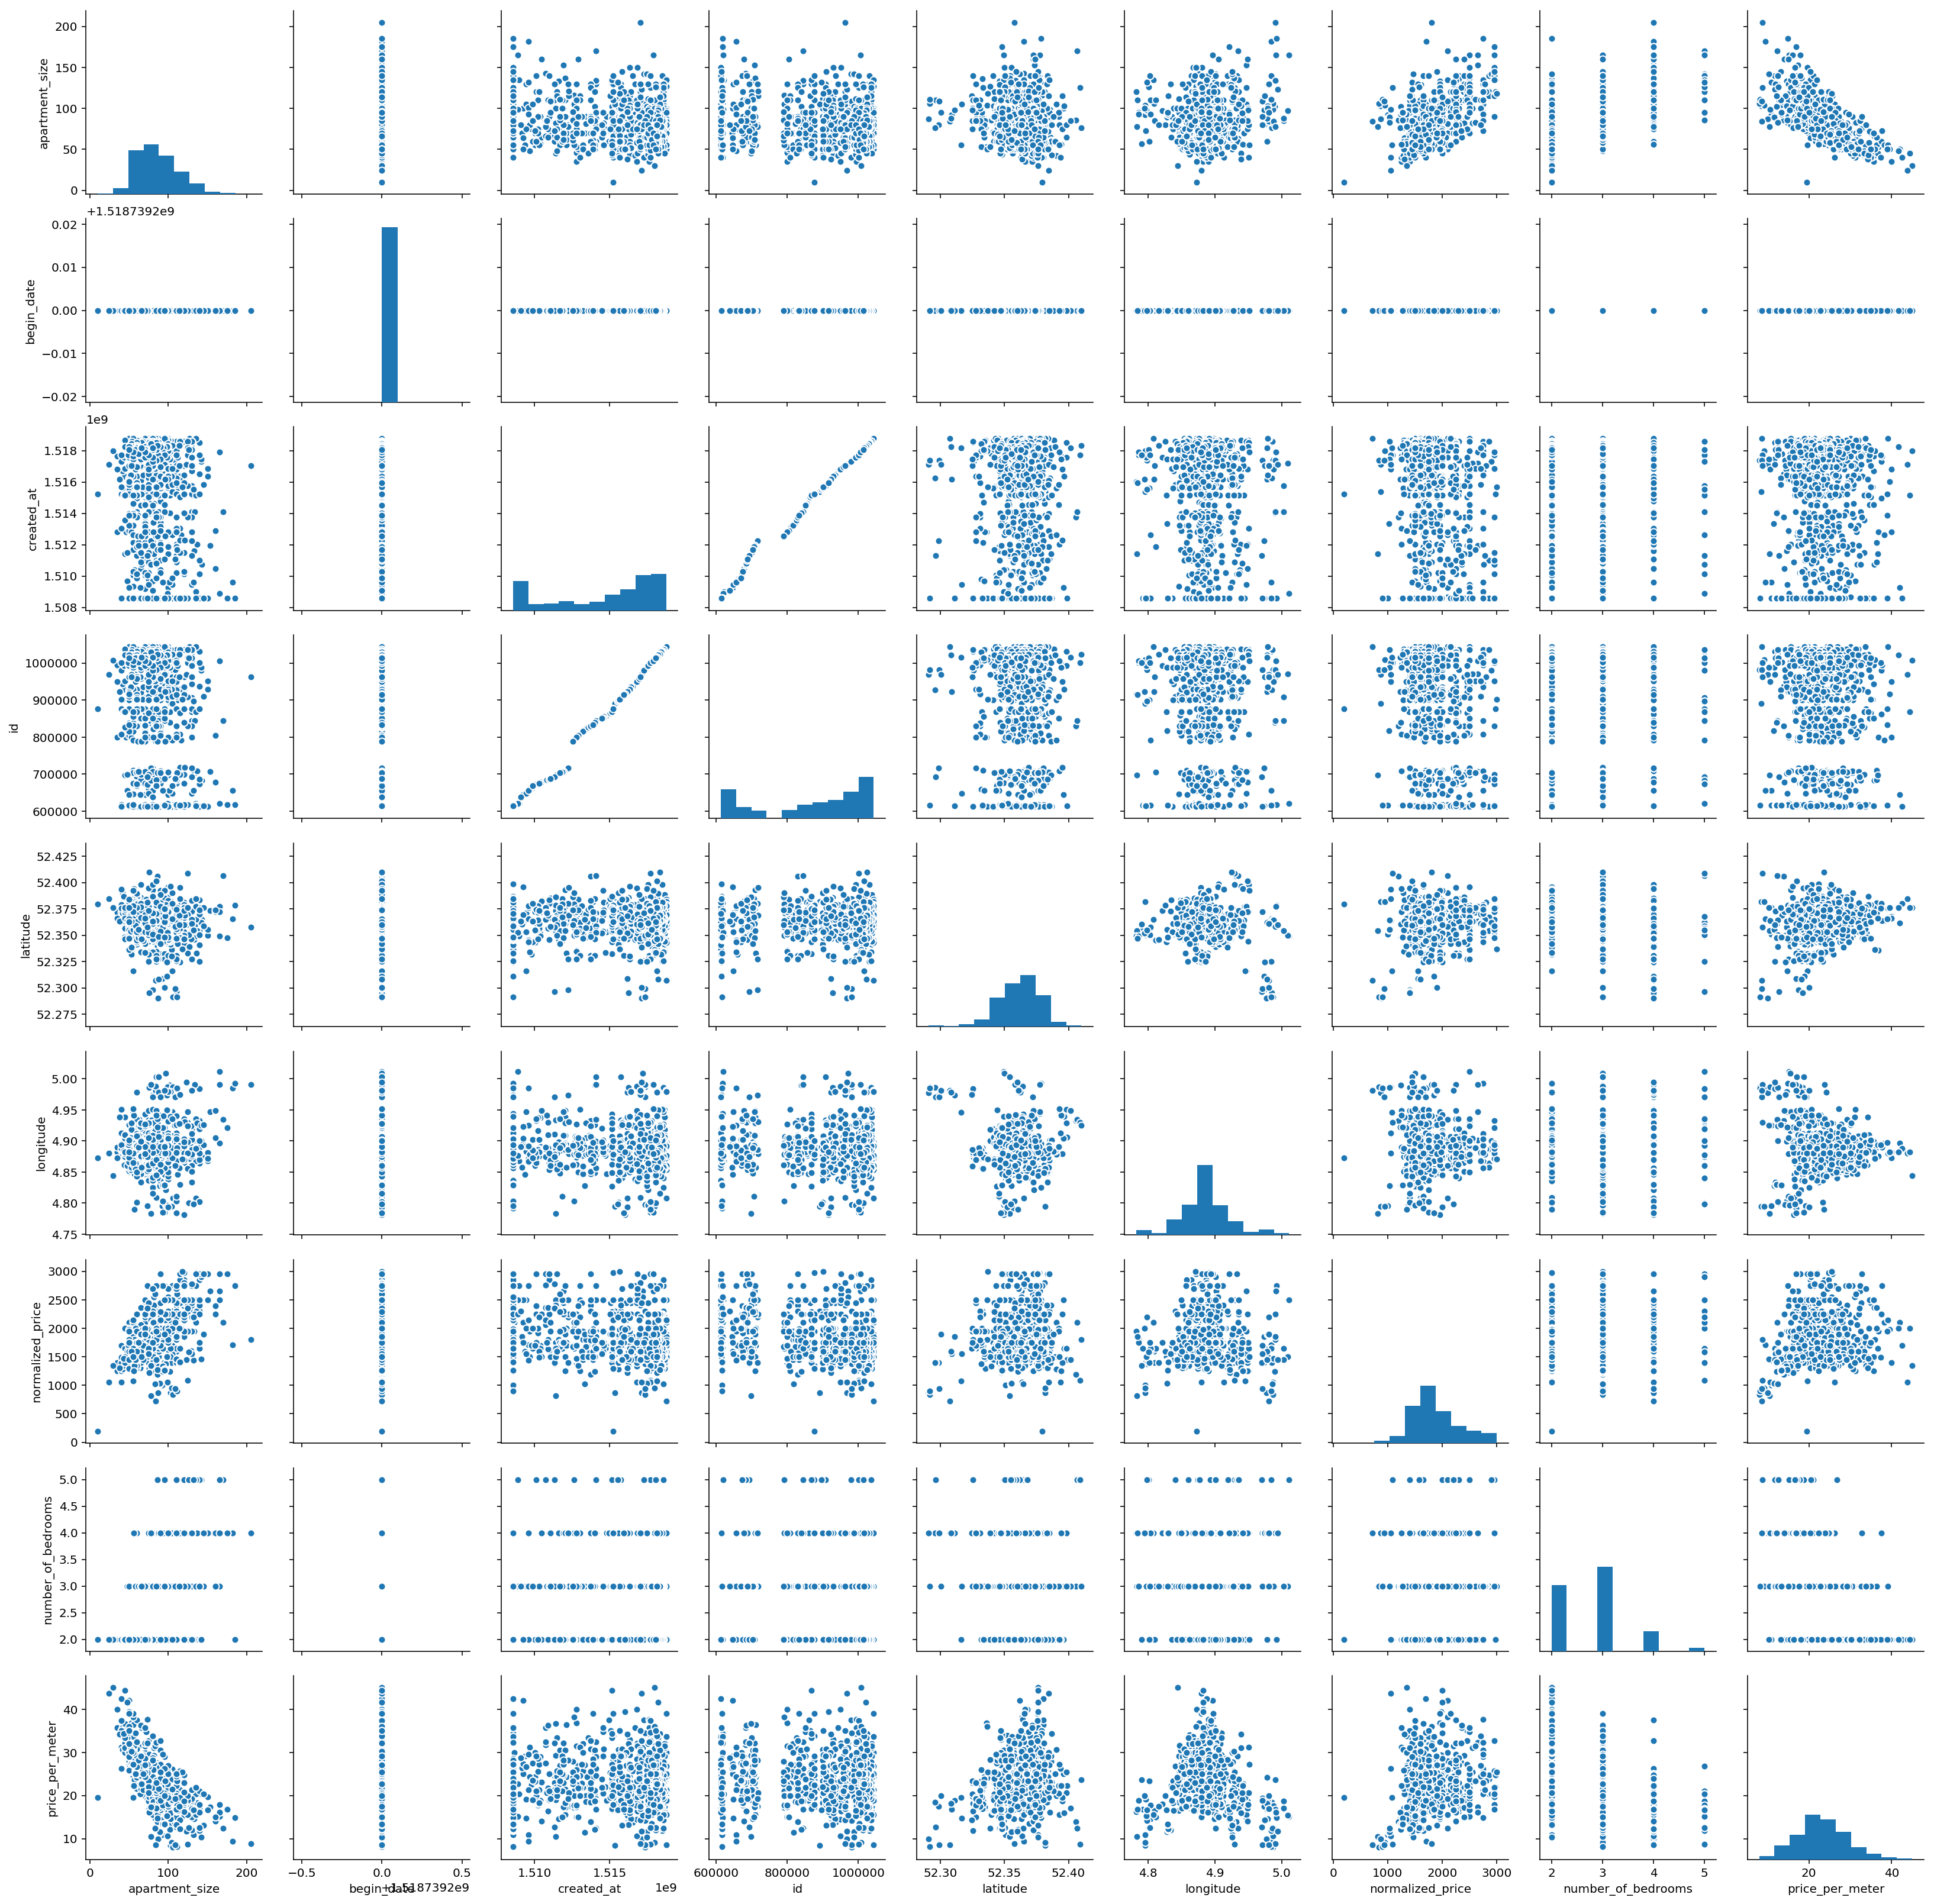

In [20]:
import seaborn as sns

sns.pairplot(df)

Interesting, some almost linear relatinships. It is true that most of them would be kind of obvious at first, e.g. normalized price versus apartment size, for example. But we were also able to find out some interesting ones, such as apartment_size versus price_per_meter.

Let's plot the Pearson Correlations between each of the varibles with the help of Seaborn's heatmap.

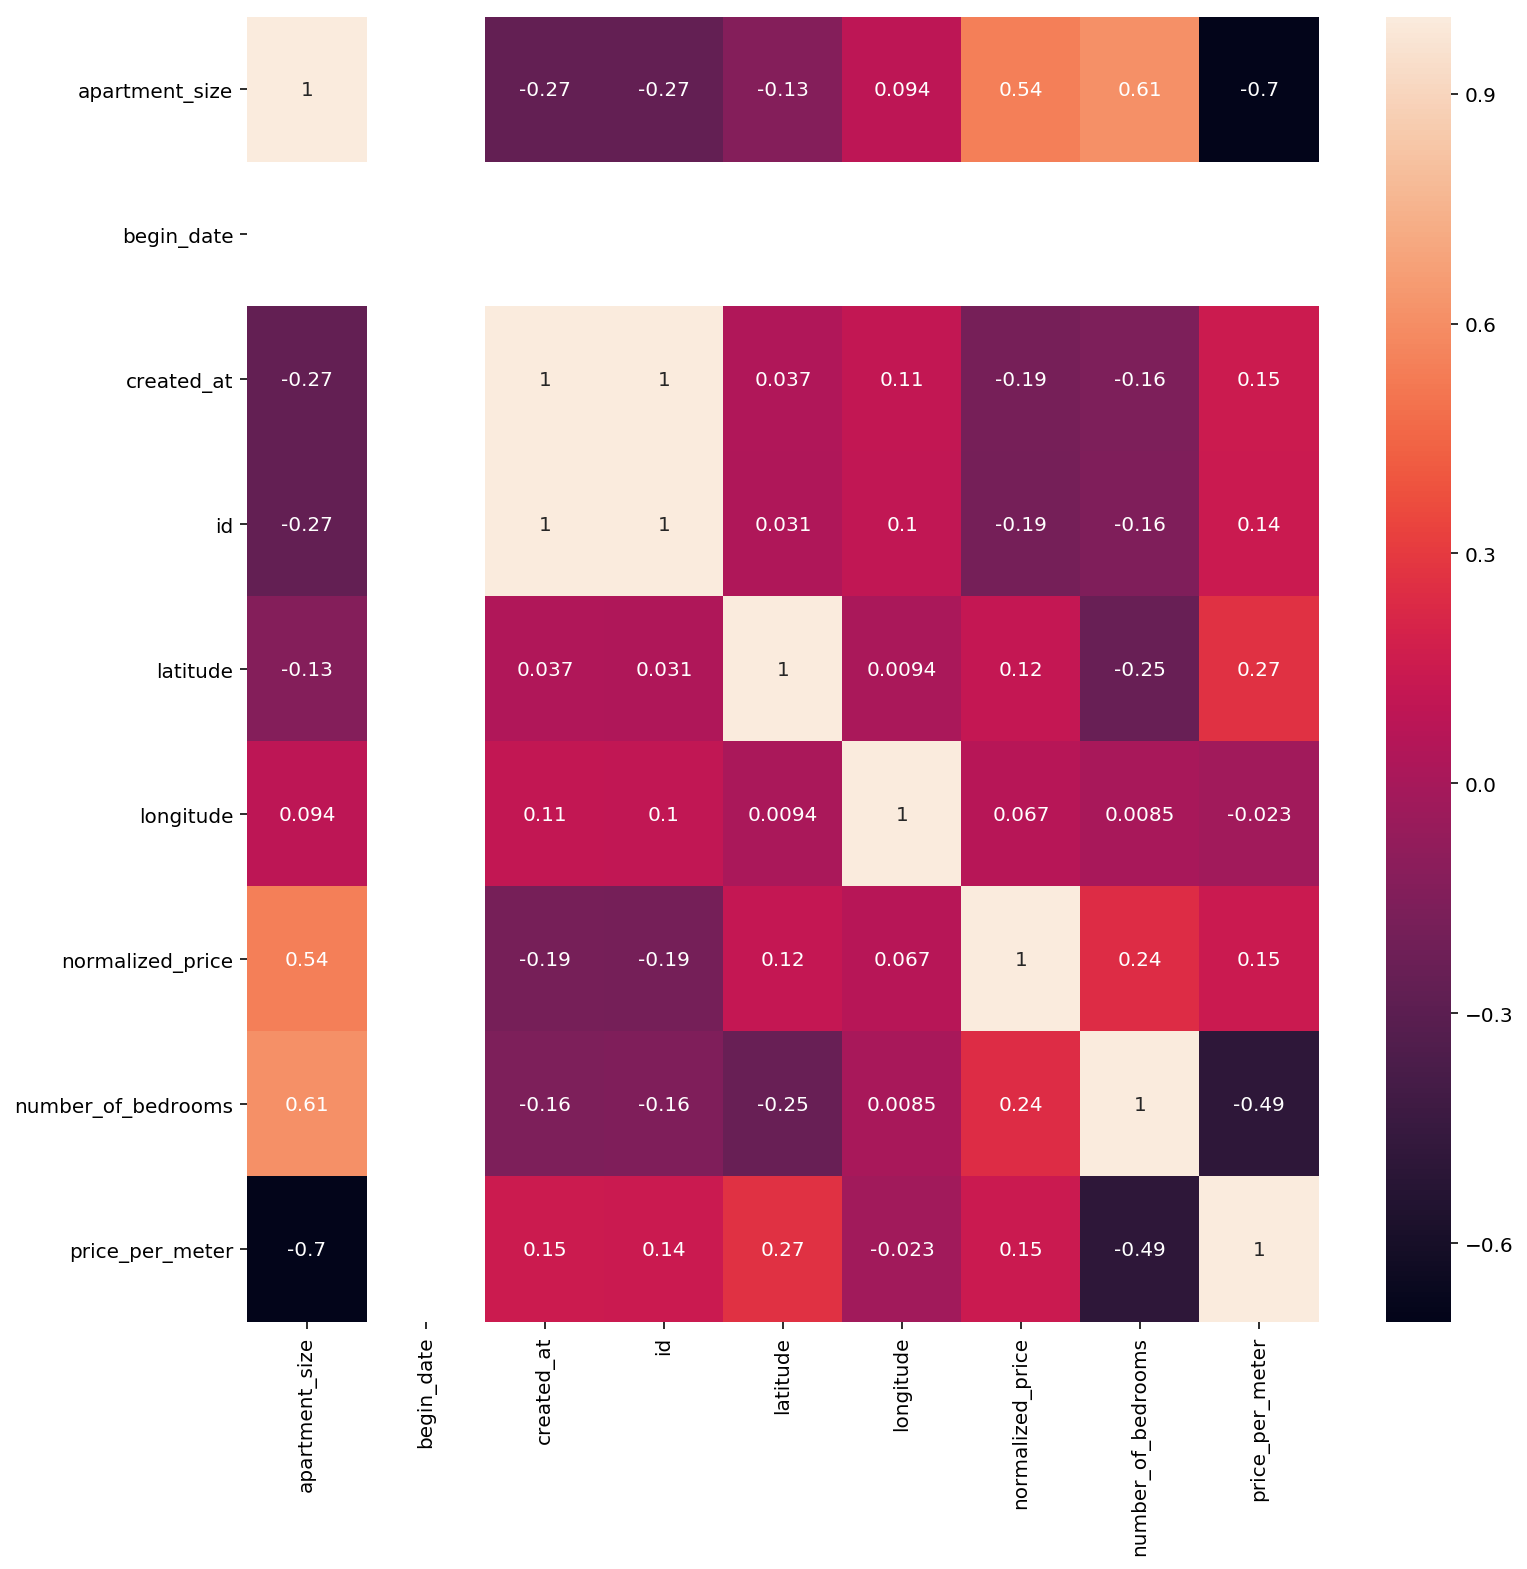

In [46]:
plt.figure(figsize=(12,12))

sns.heatmap(df.corr(), annot=True)

Some interesting findings:

1. **Price per Meter** and **Apartment Size** have a considerable negative pearson correlation index (-0.7). That is, the smaller the apartment, the higher the price per meter. This could be to a lot of factors, but my personal guess is that there is higher demand for smaller apartments. Amsterdam is consolidating itself as a destination for young people from the EU and from all over the world, who are usually single, or married without children. Moreover, even in families with children, the number of children per family has declined fast over the last years. And last, smaller places are more affordable for this kind of public. This is kind of a worldwide trend, I guess. No scientific nor statistical basis for these remarks - just pure and simple observation and speculation :)

2. **Normalized Price** and **Apartment Size** have a 0.54 pearson correlation index. Which means they are correlated, but not that much. Which makes sense, as rental price could have other components such as location, apartment conditions, and others.

3. 

In [47]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools

trace1 = go.Scatter(
    name='test',
    x = df.apartment_size,
    y = df.normalized_price,
    mode='markers',
    marker=dict(
        size='5',
        color = np.log(df.normalized_price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace2 = go.Scatter(
    x = np.log(df.apartment_size),
    y = np.log(df.normalized_price),
    mode='markers',
    marker=dict(
        size='5',
        color = np.log(df.normalized_price), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace3 = go.Scatter(
    x = np.log(df.apartment_size),
    y = np.log(df.latitude),
    mode='markers',
    marker=dict(
        size='5',
        color = np.log(df.latitude), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

trace4 = go.Scatter(
    x = np.log(df.normalized_price),
    y = np.log(df.latitude),
    mode='markers',
    marker=dict(
        size='5',
        color = np.log(df.latitude), #set color equal to a variable
        colorscale='Viridis',
        showscale=False
    )
)

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=('size x price', 'size x price (log)',
                                                          'size x latitude (log)', 'price x latitude (log)'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)



fig['layout'].update(height=600, width=800, title='Stacked subplots')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



***Categorical Features***

We have an idea of the price for each of the districts in Amsterdam.

What about a more granular perspective? Let's analyze some data related to the addresses.

What would be our hottest areas, e.g. areas with more listings?

In [192]:
df['address'].value_counts().head(30)

Henri Dunantstraat              23
Keizersgracht                   19
Prinsengracht                   13
Herengracht                     12
Spuistraat                       9
Singel                           9
Elisabeth Boddaertstraat         8
Nieuwe Spiegelstraat             7
Johannes van der Steurstraat     7
Brouwersgracht                   6
Nieuwe Kerkstraat                6
Korte Leidsedwarsstraat          6
IJburglaan                       6
Eerste Leliedwarsstraat          6
Amstel                           6
Wilhelminastraat                 5
Marnixstraat                     5
Lijnbaansgracht                  5
Eggertstraat 5                   5
Weerdestein                      5
Bos en Lommerweg                 5
Vossiusstraat                    4
Borgerstraat                     4
William Barlowlaan               4
Bloemgracht                      4
Overtoom                         4
Winthontstraat                   4
Tweede Breeuwersstraat           4
Van Nijenrodeweg    

In [24]:
df_popular_spots = df[(df['address'].isin(list(df['address'].value_counts().head(30).index)))]

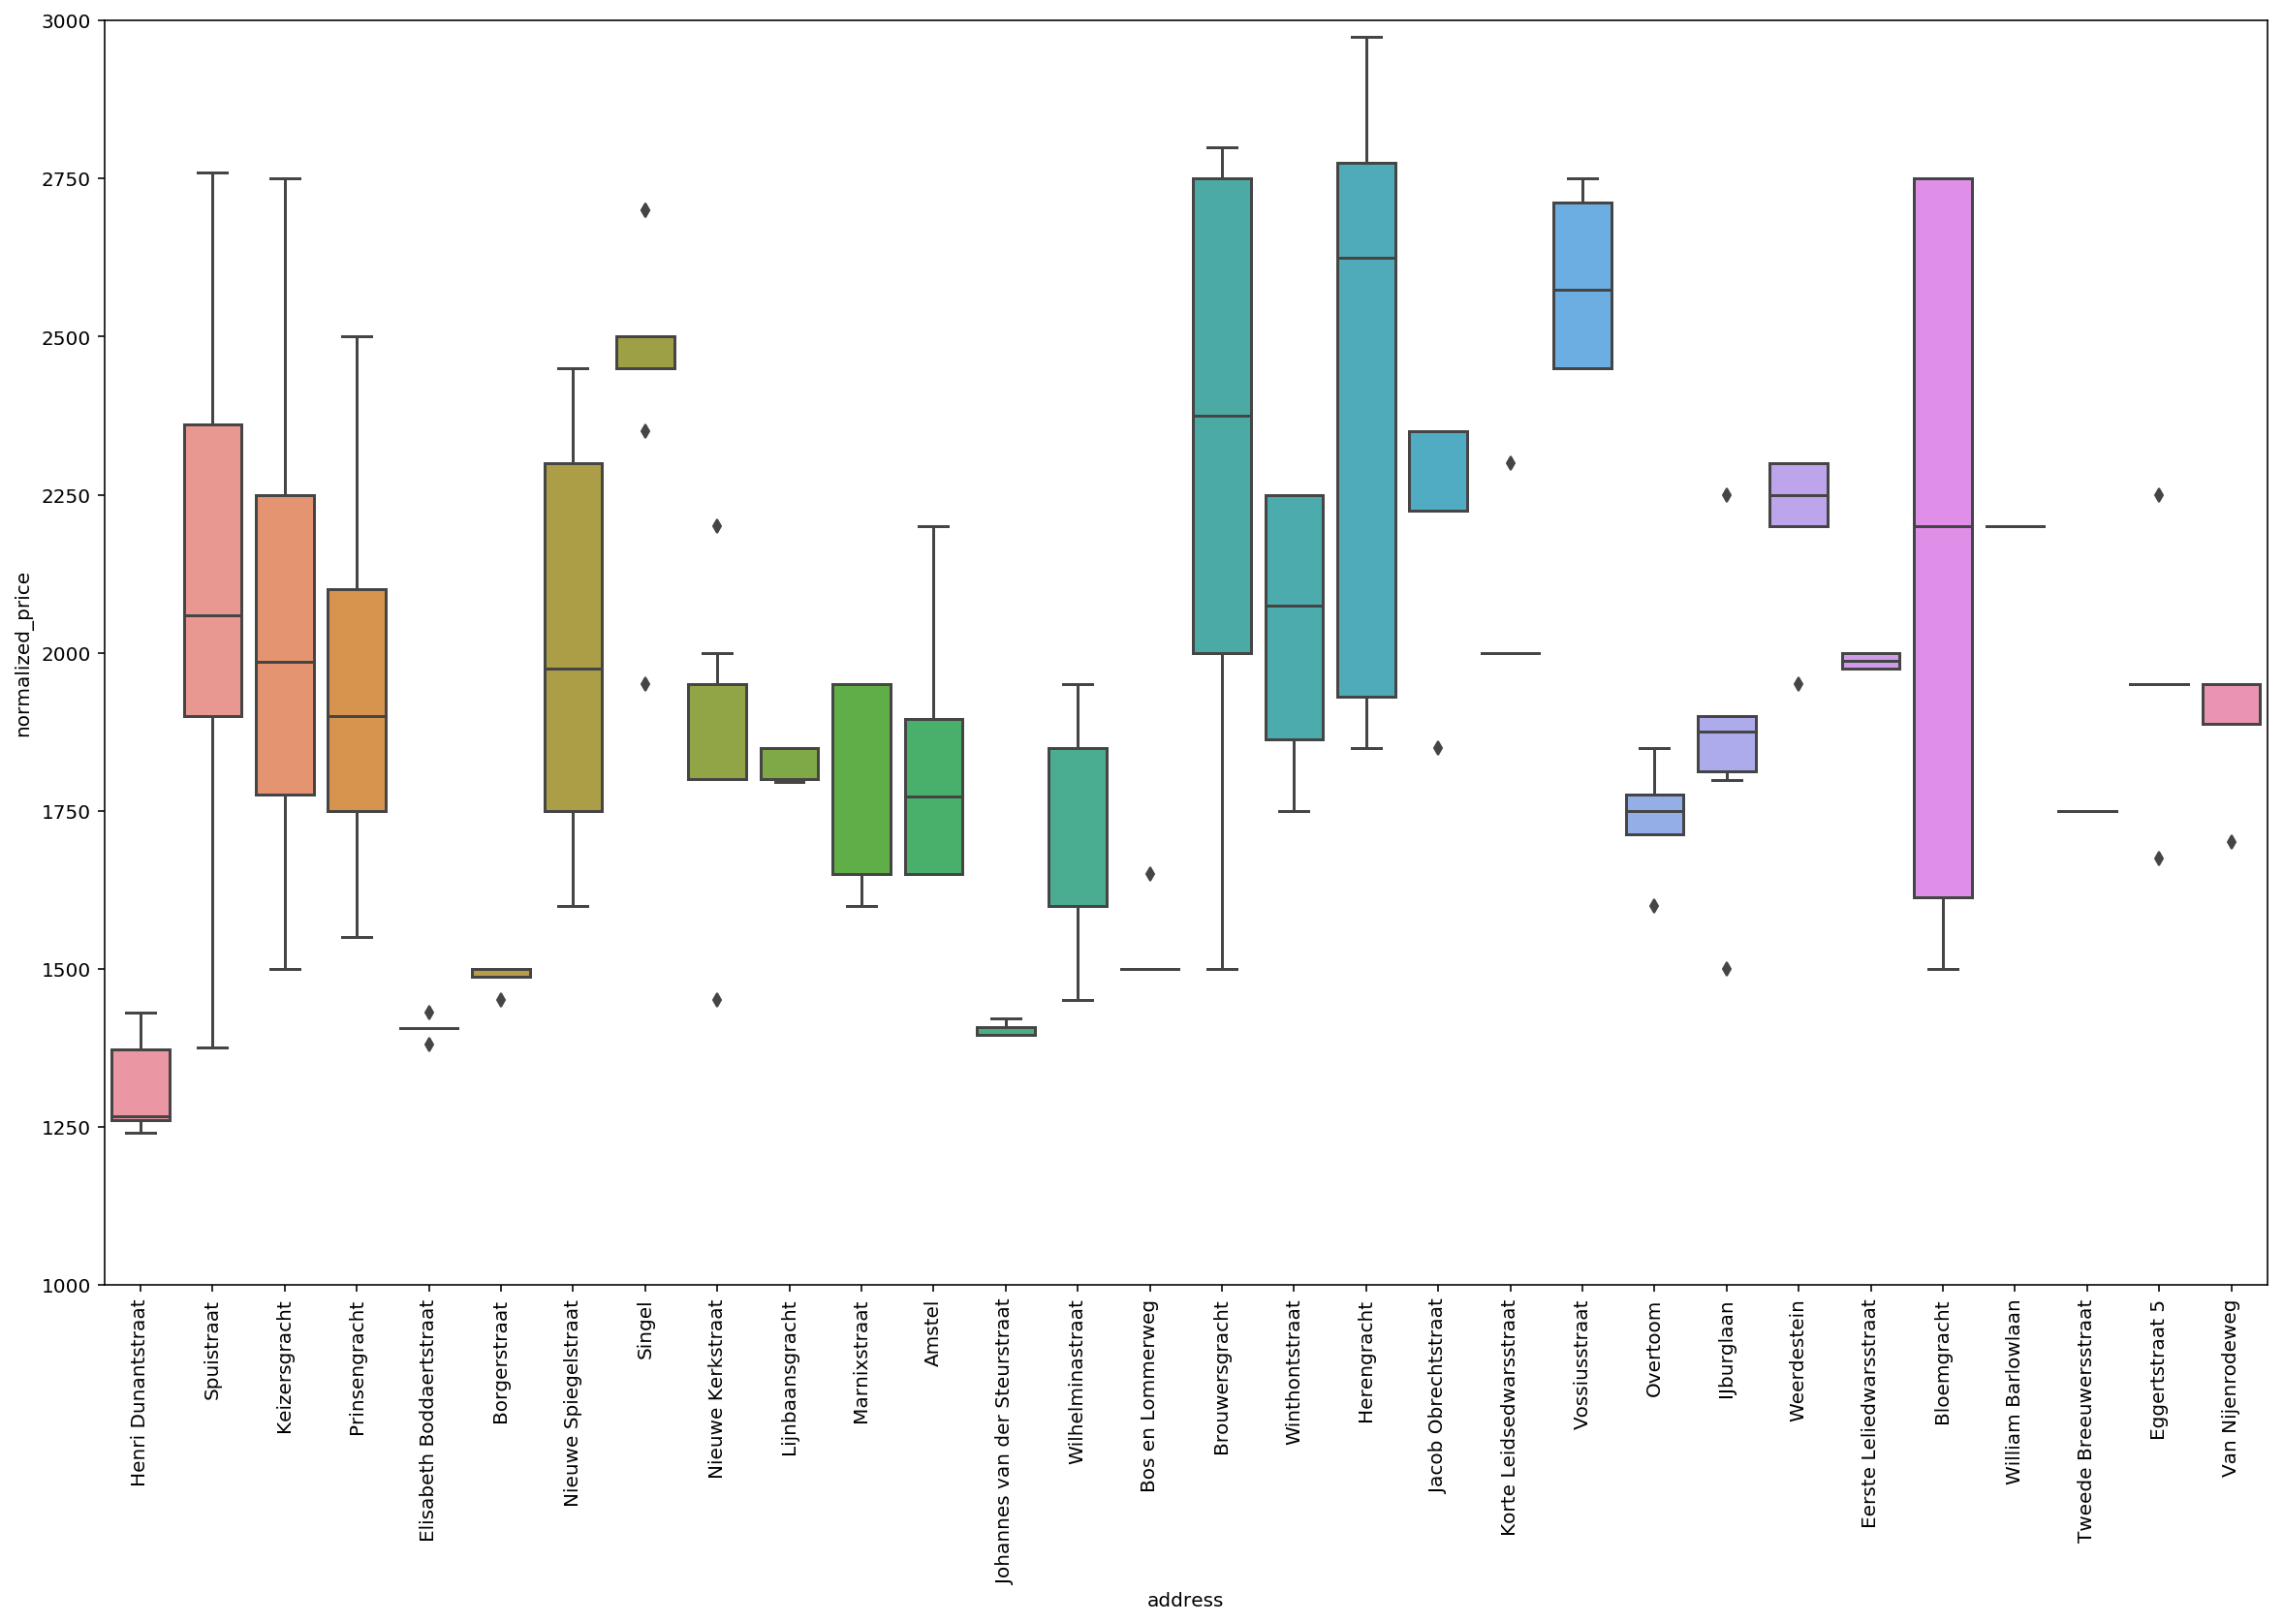

In [25]:
var = 'address'
data = pd.concat([df_popular_spots.normalized_price, df_popular_spots.loc[:,var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="normalized_price", data=data)
fig.axis(ymin=1000, ymax=3000);
plt.xticks(rotation=90);

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df.number_of_bedrooms

trace0 = go.Box(
    y=df.normalized_price,
    x=x,
    name='kale',
    marker=dict(
        color='Green'
    )
)

data = [trace0]
layout = go.Layout(
    yaxis=dict(
        title='normalized rental prices',
        zeroline=False
    ),
    boxmode='group'
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [48]:
!pip install folium

    100% |████████████████████████████████| 81kB 3.2MB/s ta 0:00:011
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.


In [49]:
import folium
from folium import plugins

In [52]:
df['price_rooms_rate'] = df.normalized_price / df.apartment_size

In [53]:
m = folium.Map([52.3733752,4.8864105], zoom_start=12, tiles='Stamen Toner')

# plot heatmap
#heatmap = plugins.HeatMap(data=df_pararius[['latitude', 'longitude', 'price_per_meter']].values.tolist(), radius=10, max_val=df_pararius.price_per_meter.max())

#heatmap = plugins.HeatMap(data=df_pararius[['latitude', 'longitude']].values.tolist(), radius=5)

#m.add_child(heatmap)
for i,row in df.iterrows():
    
    red = int((row.price_rooms_rate / df.price_rooms_rate.max()) * 255)
    
    #red = int(row.normalized_price / df_pararius.normalized_price.max()) * 255
    
    green = 255 - red
    
    html = '#%02x%02x%02x' % (red, green, 0) #convert rgb to html
    
    #print(html)
    #house_string = '{} - {}'.format(row.address, row.normalized_price)
    house_string = '{} - {}m2'.format(row.normalized_price, row.apartment_size)
    
    
    marker = folium.CircleMarker(location=[row.latitude,row.longitude], radius=(row.number_of_bedrooms*5), color=html, fill=html, fill_opacity='0.3', popup=house_string)

    m.add_child(marker)

#m.add_child(location=[52.3733752,4.8864105], radius=500,
                    #popup='Laurelhurst Park', line_color='#3186cc',
                    #fill_color='#3186cc')

marker = folium.Marker(location=[52.3670621,4.8680757])

m.add_child(marker)
        
m

In [193]:
df_cafes = pd.read_json('Amsterdam-cafe')
df_bars = pd.read_json('Amsterdam-bar')
df_active = pd.read_json('Amsterdam-active-life')
df_schools = pd.read_json('Amsterdam-education')
df_hotels = pd.read_json('Amsterdam-hotelstravel')
df_transportation = pd.read_json('Amsterdam-transportation')

In [194]:
def distance_points(point1, point2):
    
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [220]:
def nearby_places(df_apartments, df_places):
    
    df_places['longitude'] = [d.get('longitude') for d in df_places.coordinates]
    df_places['latitude'] = [d.get('latitude') for d in df_places.coordinates]
    
    distance_apartments = dict(zip(df_apartments.index, [0]*df_apartments.shape[0]))
    
    #print(distance_apartments)

    for i, row1 in df_apartments.iterrows():
        point1 = (row1.latitude, row1.longitude)
        for j, row2 in df_places.iterrows():
            point2 = (row2.latitude, row2.longitude)
            distance = distance_points(point1, point2)
            if (distance < 0.3):
                distance_apartments[i] = distance_apartments[i] + 1
                #print('{} - {}'.format(row1.address, distance_points(point1, point2)))
    #print(distance_apartments)
    #print(pd.DataFrame.from_dict(distance_apartments, orient='index'))
    return pd.DataFrame.from_dict(distance_apartments, orient='index')
    

In [221]:
dict_pois = {'bars': df_bars, 'cafes': df_cafes, 'active': df_active, 'schools': df_schools, 'hotels': df_hotels, 'transportation': df_transportation}

In [222]:
dict_pois_radius = {}

In [223]:
for k in dict_pois.keys():
    print(k)
    df_places = pd.DataFrame.from_dict(dict_pois[k])
    df_nearby = nearby_places(df, df_places)
    df_nearby.columns = [k]
    df = pd.concat([df, df_nearby], axis=1)

bars
cafes
active
schools
hotels
transportation


In [224]:
df.head(20)

apartment_size  begin_date  created_at       id   latitude  longitude  \
0             50.0  1518739200  1518678886  1037654  52.374235   4.863561   
1             93.0  1518739200  1518592558  1035398  52.346959   4.922161   
2             92.0  1518739200  1516172536   922046  52.308798   4.978442   
3            103.0  1518739200  1515365662   890896  52.381874   4.794895   
4             55.0  1518739200  1517726698  1000917  52.372062   4.897713   
5             60.0  1518739200  1511320138   692713  52.367498   4.860455   
6             93.0  1518739200  1508572207   615559  52.348098   4.829354   
7             95.0  1518739200  1512637280   791147  52.349978   4.893084   
8             40.0  1518739200  1508573933   617301  52.375270   4.891070   
9             50.0  1518739200  1513993321   837587  52.365093   4.925862   
10            35.0  1518739200  1512806580   799352  52.367916   4.882019   
11            83.0  1518739200  1516172687   922103  52.347471   4.921965   
12            35.0  1518739200  1517639273   994350  52.371509   4.890172   
13            40.0  1518739200  1517292215   979324  52.363711   4.895310   
14            70.0  1518739200  1512032525   708520  52.377125   4.896189   
15            65.0  1518739200  1508571030   614424  52.398775   4.905580   
16            90.0  1518739200  1514787353   858970  52.352950   4.847256   
17            55.0  1518739200  1516172425   922004  52.373841   4.899691   
18            40.0  1518739200  1515232709   875734  52.362913   4.885071   
19            50.0  1518739200  1508571156   614552  52.354017   4.887535   

    normalized_price  number_of_bedrooms  bars  cafes       ...        \
0             1450.0                   2     0      0       ...         
1             1334.0                   4     0      0       ...         
2             1550.0                   4     0      0       ...         
3              870.0                   3     0      0       ...         
4             1500.0                   3     7      7       ...         
5             1375.0                   3     0      0       ...         
6             1257.0                   3     0      0       ...         
7             2000.0                   5     1      2       ...         
8             1375.0                   2     8      1       ...         
9             1500.0                   2     1      0       ...         
10            1400.0                   2     5      3       ...         
11            1226.0                   3     0      0       ...         
12            1250.0                   2     5      5       ...         
13            1500.0                   2     5      6       ...         
14            1500.0                   2     7      3       ...         
15            1450.0                   3     0      0       ...         
16            1695.0                   4     0      1       ...         
17            1500.0                   2     6      6       ...         
18            1350.0                   2     9      6       ...         
19            1395.0                   2     5      5       ...         

    Woestduinstraat  Wolbrantskerkweg  Zacharias Jansestraat 22  \
0                 0                 0                         0   
1                 0                 0                         0   
2                 0                 0                         0   
3                 0                 0                         0   
4                 0                 0                         0   
5                 0                 0                         0   
6                 0                 0                         0   
7                 0                 0                         0   
8                 0                 0                         0   
9                 0                 0                         0   
10                0                 0                         0   
11                0                 0           

In [225]:
df.head()

apartment_size  begin_date  created_at       id   latitude  longitude  \
0            50.0  1518739200  1518678886  1037654  52.374235   4.863561   
1            93.0  1518739200  1518592558  1035398  52.346959   4.922161   
2            92.0  1518739200  1516172536   922046  52.308798   4.978442   
3           103.0  1518739200  1515365662   890896  52.381874   4.794895   
4            55.0  1518739200  1517726698  1000917  52.372062   4.897713   

   normalized_price  number_of_bedrooms  bars  cafes       ...        \
0            1450.0                   2     0      0       ...         
1            1334.0                   4     0      0       ...         
2            1550.0                   4     0      0       ...         
3             870.0                   3     0      0       ...         
4            1500.0                   3     7      7       ...         

   Woestduinstraat  Wolbrantskerkweg  Zacharias Jansestraat 22  \
0                0                 0                         0   
1                0                 0                         0   
2                0                 0                         0   
3                0                 0                         0   
4                0                 0                         0   

   Zoutkeetsplein  bars  cafes  active  schools  hotels  transportation  
0               0     0      0       0        0       0               0  
1               0     0      0       0        0       0               0  
2               0     0      0       0        0       0               0  
3               0     0      0       0        0       0               0  
4               0     4      3       0        1       0               1  

[5 rows x 584 columns]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
df = df.join(pd.get_dummies(df.district1))
df = df.join(pd.get_dummies(df.address))

df = df.drop(['district1', 'address'], axis=1)

In [58]:
df = df.drop('price_per_meter', axis=1)

In [59]:
df = df.drop('category', axis=1)

In [60]:
df = df.drop(['created_at', 'begin_date'], axis=1)
df = df.drop('price_rooms_rate', axis=1)

In [69]:
X_train, x_test, Y_train, y_test = train_test_split(df.drop('normalized_price', axis=1), df.normalized_price)

In [70]:
model = RandomForestRegressor(n_estimators=50)

In [71]:
model.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [72]:
pred = model.predict(x_test)

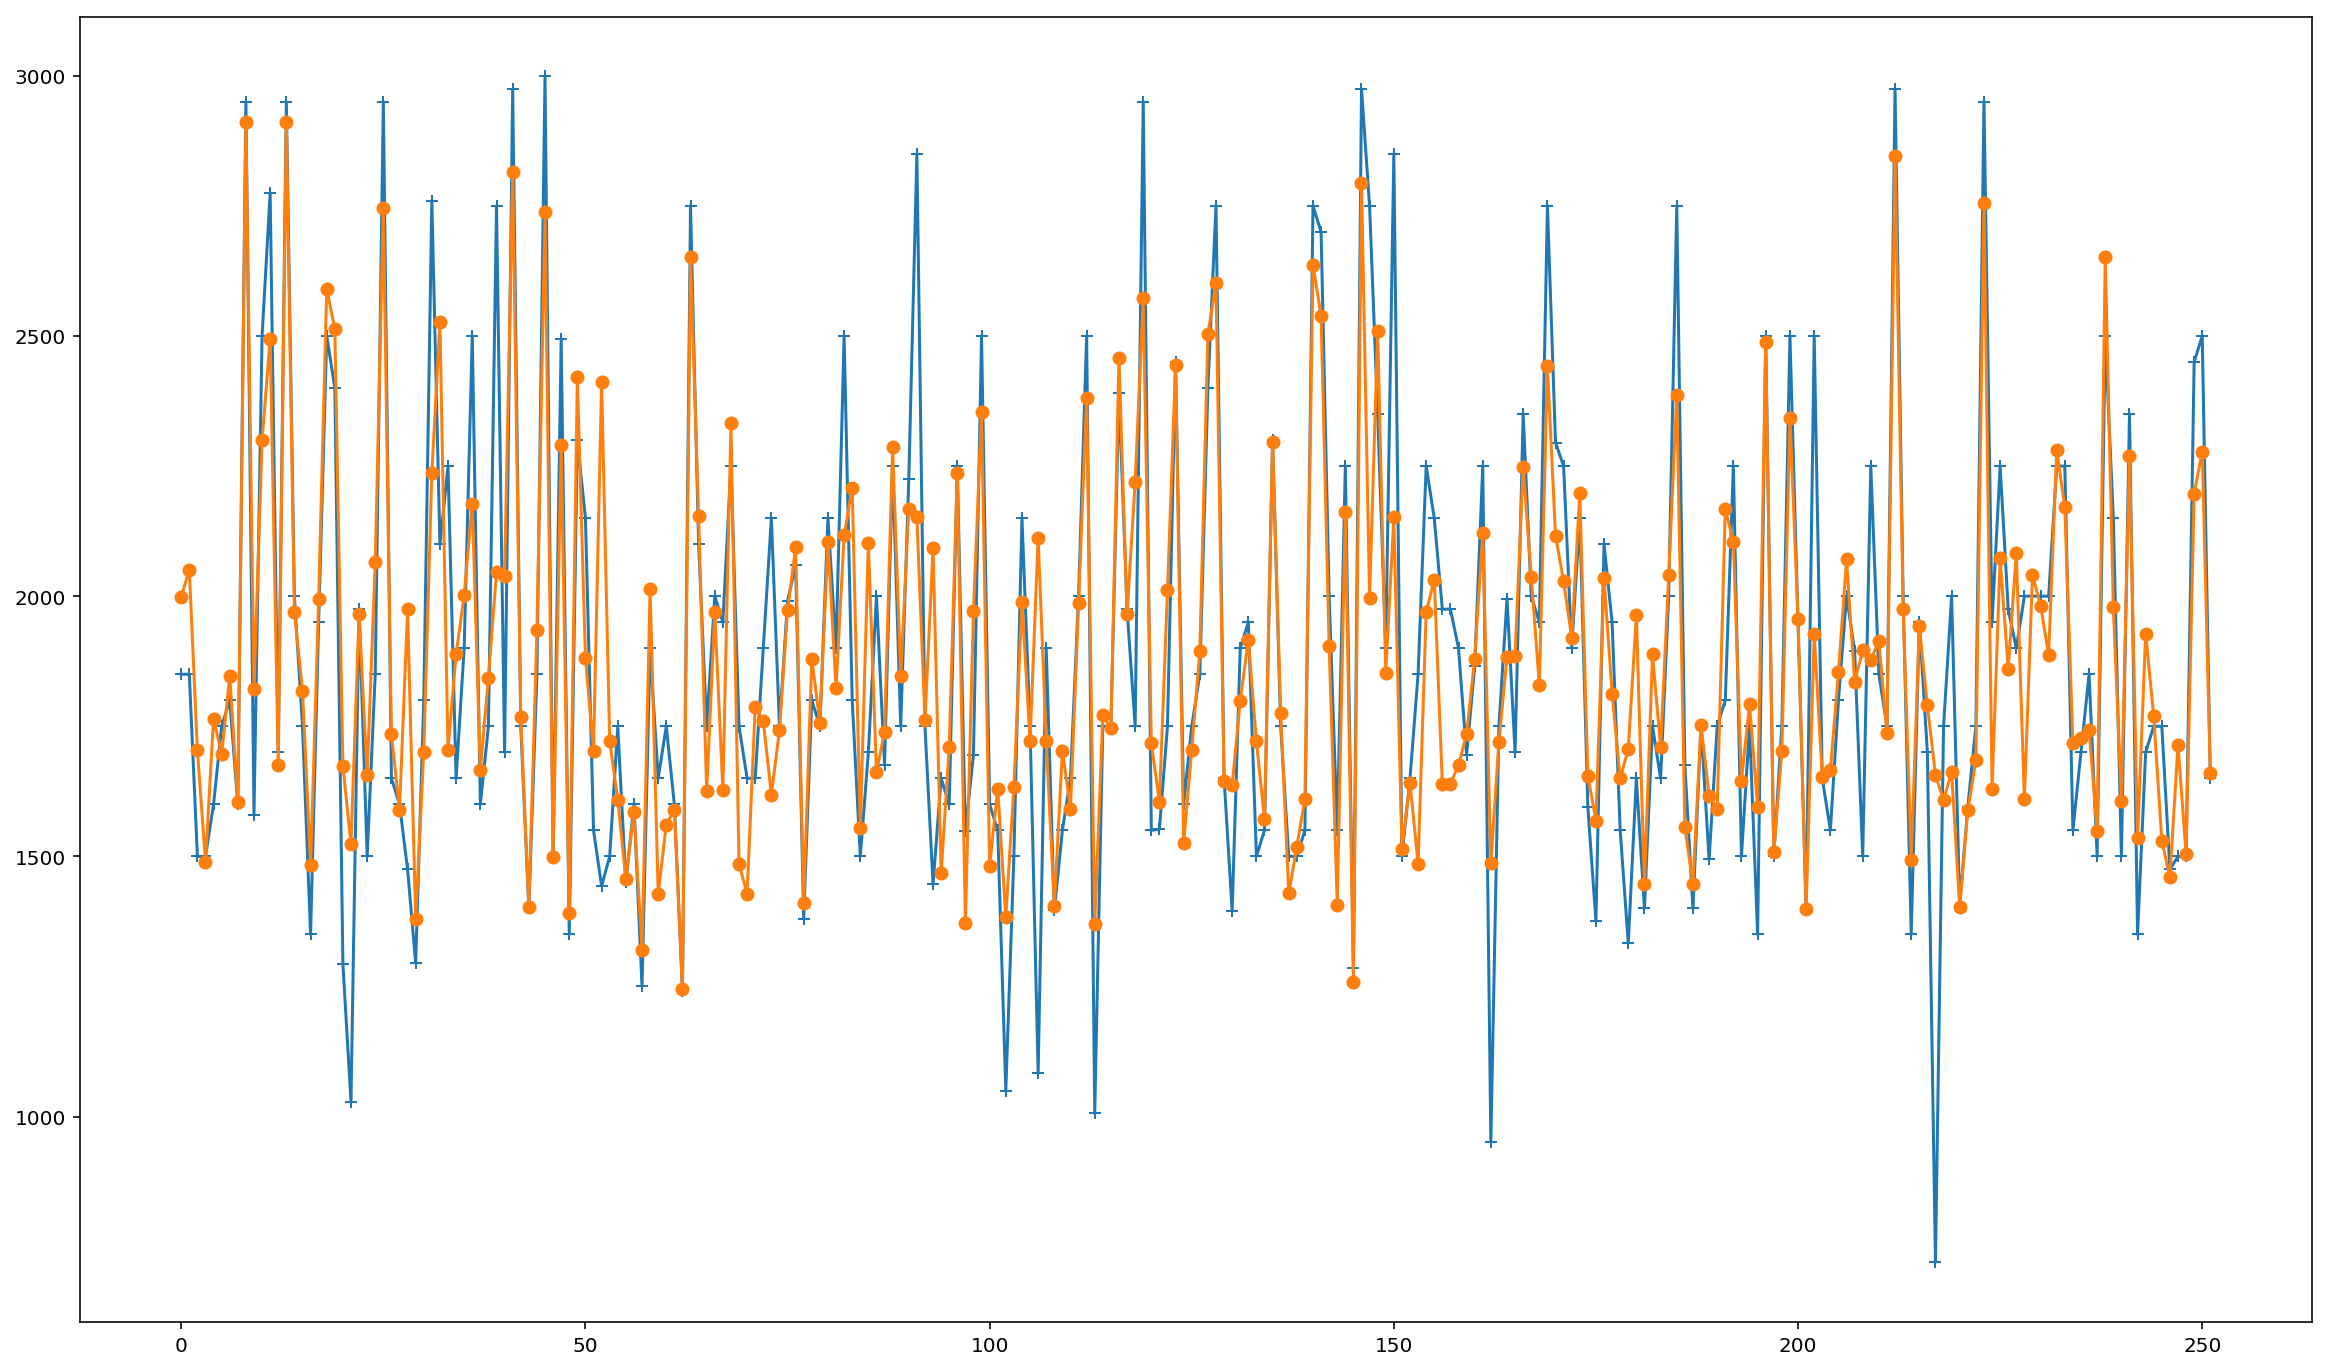

In [73]:
plt.figure(figsize=(20,12))

plt.plot(range(0, y_test.shape[0]), y_test, marker='+')
plt.plot(range(0, pred.shape[0]), pred, marker='o')

In [74]:
model.score(x_test, y_test)

0.7109778018445378

In [232]:
important_features_dict = {}
for x,i in enumerate(model.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print('Most important features: {}', important_features_list[:15])

Most important features: {} [0, 5, 4, 7, 8, 3, 10, 2, 6, 9, 18, 580, 12, 506, 577]


In [233]:
feature_importances = {}

i = 0

for item in important_features_list[:15]:
    
    feature_importances[i] = X_train.columns[item]
    i = i+1

In [234]:
feature_importances

{0: 'apartment_size',
 1: 'longitude',
 2: 'latitude',
 3: 'bars',
 4: 'cafes',
 5: 'id',
 6: 'schools',
 7: 'created_at',
 8: 'number_of_bedrooms',
 9: 'active',
 10: 'amsterdam-zuid',
 11: 'schools',
 12: 'transportation',
 13: 'Van Hallstraat',
 14: 'bars'}

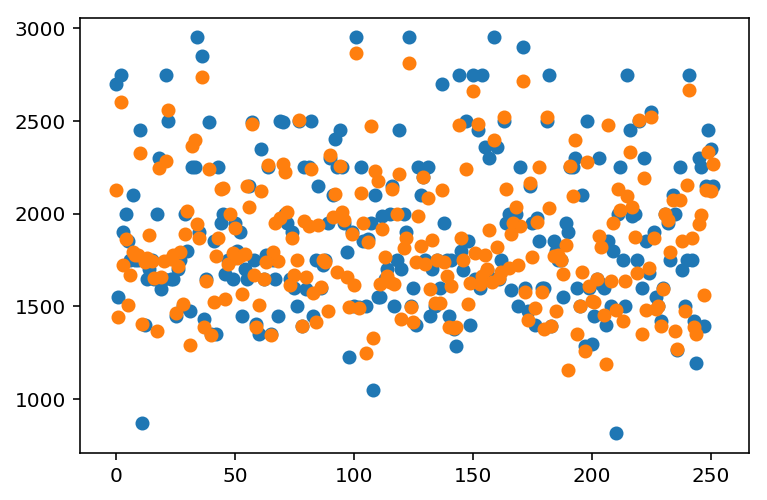

In [64]:
plt.scatter(x=range(0,y_test.shape[0]), y=y_test)
plt.scatter(x=range(0,y_test.shape[0]), y=pred)